In [1]:
%run C:/Users/MohammedSB/Desktop/projects/Hypertension/Requirements.ipynb

In [2]:
# Seed
set_seed(0)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
PATH = r"D:\\MohammedSB\\Fundus\\"
CSV_PATH = {"HTNPath": PATH + r"HTN", "NonHTNPath": PATH + "NonHTN"}

MODELS_PATH = r"C:\Users\MohammedSB\Desktop\projects\Hypertension\Models"

# AUROC Graphs

In [5]:
def drawPRs(systems, colors):
    plt.title('Precision-recall Curve (PR)')
    for system in systems:
        f = open(os.getcwd() + '/Results/' + system + ".json")
        data_json = json.load(f)
        trues, probs = data_json['true'], data_json['prob']
        
        auc_scores = []
        N = len(data_json['true'])
        
        for i in range(N):
            precision, recall, _ = precision_recall_curve(trues[f'{i}'], probs[f'{i}'])
            auc_scores.append(auc(recall, precision))
               
        lower = np.percentile(auc_scores, 2.5, method='nearest')
        upper = np.percentile(auc_scores, 97.5, method='nearest')
        median = np.percentile(auc_scores, 50, method='nearest')

        lower_index = auc_scores.index(lower)
        upper_index = auc_scores.index(upper)
        median_index = auc_scores.index(median)

        trues_lower, probs_lower = trues[f'{lower_index}'], probs[f'{lower_index}']
        trues_upper, probs_upper = trues[f'{upper_index}'], probs[f'{upper_index}']
            
        precision, recall, _ = precision_recall_curve(trues_lower, probs_lower)
        cl = plt.plot(recall, precision, color=colors[system], alpha=0.25)   
        x = cl[0].get_xdata()
        
        precision, recall, _ = precision_recall_curve(trues_upper, probs_upper)
        cu = plt.plot(recall, precision, color=colors[system], alpha=0.25)   
            
        precision, recall, _= precision_recall_curve(trues[f'{median_index}'], probs[f'{median_index}']) 
        auc_median = round(auc(recall, precision), 3)
        cm = plt.plot(recall, precision, label=f"Median {system} AUC: {auc_median}", color=colors[system])

        plt.fill(
            np.append(cu[0].get_xdata(), cl[0].get_xdata()[::-1]),
            np.append(cu[0].get_ydata(), cl[0].get_ydata()[::-1]),
            alpha=0.25
        )
        
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

In [6]:
def drawROCs(systems, colors):
    plt.title('Receiver Operating Characteristic (ROC)')
    for system in systems:
        f = open(os.getcwd() + '/Results/' + system + ".json")
        data_json = json.load(f)
        trues, probs = data_json['true'], data_json['prob']
        
        auc_scores = []
        N = len(data_json['true'])
        
        for i in range(N):
            fpr, tpr, _ = roc_curve(trues[f'{i}'], probs[f'{i}'])
            auc_scores.append(auc(fpr, tpr))
                    
        lower = np.percentile(auc_scores, 2.5, method='nearest')
        upper = np.percentile(auc_scores, 97.5, method='nearest')
        median = np.percentile(auc_scores, 50, method='nearest')

        lower_index = auc_scores.index(lower)
        upper_index = auc_scores.index(upper)
        median_index = auc_scores.index(median)

        trues_lower, probs_lower = trues[f'{lower_index}'], probs[f'{lower_index}']
        trues_upper, probs_upper = trues[f'{upper_index}'], probs[f'{upper_index}']
            
        fpr_lower, tpr_lower, threshold = roc_curve(trues_lower, probs_lower)
        cl = plt.plot(fpr_lower, tpr_lower, color=colors[system], alpha=0.25)   
        x = cl[0].get_xdata()
        
        fpr_upper, tpr_upper, threshold = roc_curve(trues_upper, probs_upper)
        cu = plt.plot(fpr_upper, tpr_upper, color=colors[system], alpha=0.25)   
            
        fpr_median, tpr_median, _ = roc_curve(trues[f'{median_index}'], probs[f'{median_index}']) 
        auc_median = round(auc(fpr_median, tpr_median), 3)
        cm = plt.plot(fpr_median, tpr_median, label=f"Median {system} AUC: {auc_median}", color=colors[system])

        plt.fill(
            np.append(cu[0].get_xdata(), cl[0].get_xdata()[::-1]),
            np.append(cu[0].get_ydata(), cl[0].get_ydata()[::-1]),
            alpha=0.25
        )
        
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [7]:
systems = ['FeatureFusion', 'FundusModel', 'DemographicFCNN']
colors = {'FeatureFusion':'#4285F4', 'FundusModel':'#DB4437', 'DemographicFCNN':'#0F9D58'}

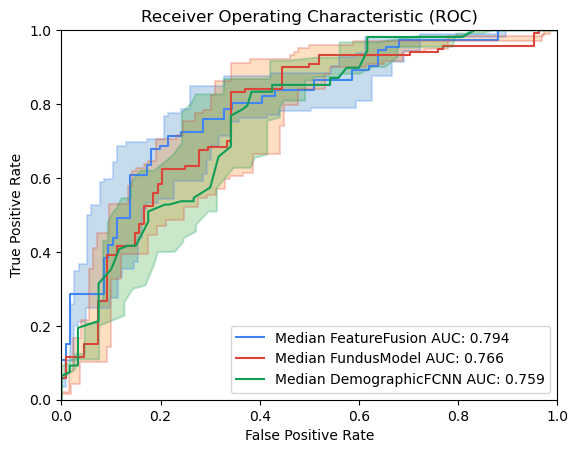

In [8]:
drawROCs(systems, colors)

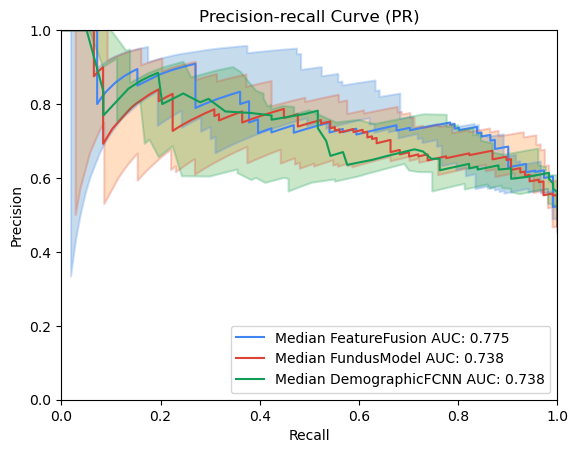

In [9]:
drawPRs(systems, colors)

In [10]:
systems = ['FeatureFusion', 'LateFusionFCNN', "VotingFeaturesFCNN"]
colors = {'FeatureFusion':'#4285F4', 'LateFusionFCNN':'#DB4437',
          "VotingFeaturesFCNN":"#0F9D58"}

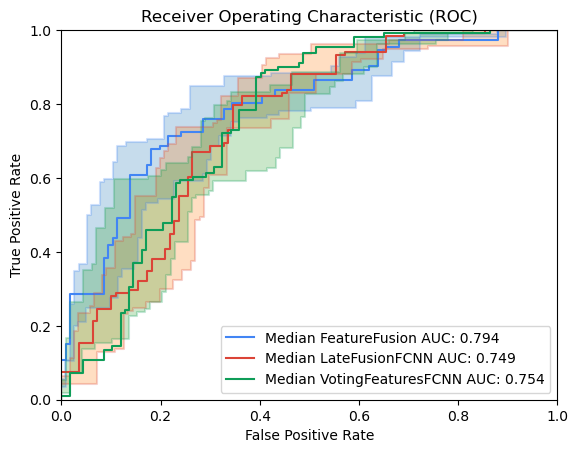

In [11]:
drawROCs(systems, colors)

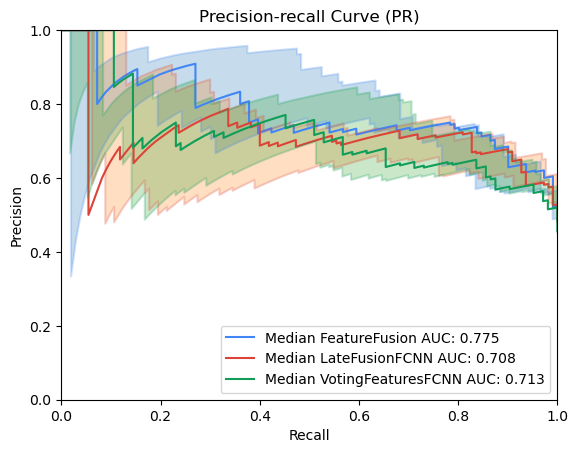

In [12]:
drawPRs(systems, colors)